# Felipe Castillo
# ClassificationHomeWork
# Data Mining
# 04/17/2022

In [1]:
import pandas as pd 
from textblob import TextBlob,classifiers
from sklearn.model_selection import train_test_split
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score,recall_score,f1_score
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn import metrics
import matplotlib.pyplot as plt
import os 
import sys
import nltk
import numpy as np
from difflib import SequenceMatcher
import seaborn as sns
nltk.download('punkt')
nltk.download('stopwords')
  

    
#Change path to week one folder for DSC-550
#Current directory in documents
os.chdir('C:\DataScience_DSC_550\Week5\labeledTrainData.tsv')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cast6\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cast6\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
#!{sys.executable} -m pip install 

# 1. Get the stemmed data using the same process you did in Week 3.

In [2]:
# Import data
#Load tsv file
#Setting a dataframe as an untampered version of dataset
BWMBP_Org_Df =  pd.read_csv("labeledTrainData.tsv", sep='\t')

#copying an instance of BWMBP_Org_Df  
BWMBP_df = BWMBP_Org_Df.copy()


In [3]:
BWMBP_df.head(1)

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...


In [4]:
#reseting index to work with original data set
BWMBP_MOD_DF = BWMBP_Org_Df.copy()
#1.Convert all text to lowercase letters.
BWMBP_MOD_DF['review'] = BWMBP_MOD_DF['review'].str.lower()
#2.Remove punctuation and special characters from the text.
#digits in this case will be defind as special characters, therefore digits will be removed
BWMBP_MOD_DF['review'] = BWMBP_MOD_DF['review'].str.replace(r'[^\w\s]+|[0-9]', '')

<ipython-input-4-14f77e2b0d0b>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  BWMBP_MOD_DF['review'] = BWMBP_MOD_DF['review'].str.replace(r'[^\w\s]+|[0-9]', '')


In [6]:
#3. Removing stop words
#Seting stop_words to instance of stopwords class.
#words set to english
stop_word = stopwords.words('english')

add_words=('ive','him', 'dont')
for i in add_words:
    stop_word.append(i)



In [7]:
#Updateing current review column
#For each review apply function if word is not in stop words then we keep the word
BWMBP_MOD_DF['review'] = BWMBP_MOD_DF['review'].apply(lambda x:[word for word in x.split() if word not in (stop_word)])


In [8]:
#Words instead of sentences
BWMBP_MOD_DF.head(3)

,id,sentiment,review
0,5814_8,1,"[stuff, going, moment, mj, started, listening,..."
1,2381_9,1,"[classic, war, worlds, timothy, hines, enterta..."
2,7759_3,0,"[film, starts, manager, nicholas, bell, giving..."


In [9]:
#Setting stemmer object.
stemmer = PorterStemmer()

In [10]:
#Wanting the whole sentence and not just the individual word
#Wanting the porter stemmer and words to be returned stemmed
def PorterStemmerSentenceConversion(sentence):
    #takes in sentence 
    updatedSentence = ''
    #Each word will be stem individually
    for word in sentence:
        #Setting a temp value to store stem word
        temp_sentence = (stemmer.stem(word))
        #adding it to one sentence instead of keeping them seperate
        updatedSentence = updatedSentence + ' '+ temp_sentence
    #returning the combind words
    return updatedSentence

In [11]:
#Taking the index count of each sentence in review
for i in range(len(BWMBP_MOD_DF['review'])):
    #Applying function to retrieve updated sentence
    #Gets the sentence at [i] index
    temp_stemmer_converted = PorterStemmerSentenceConversion(BWMBP_MOD_DF['review'][i])
    #Updates the review column at index i with updated stemmed sentence
    BWMBP_MOD_DF['review'][i] = temp_stemmer_converted

<ipython-input-11-bd0898d94c55>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BWMBP_MOD_DF['review'][i] = temp_stemmer_converted


In [12]:
#Shows updated sentences
BWMBP_MOD_DF.head(2)

,id,sentiment,review
0,5814_8,1,stuff go moment mj start listen music watch o...
1,2381_9,1,classic war world timothi hine entertain film...


In [13]:
#Easier to work with at this state
sentence_list = []

In [14]:
#taking sentence and inserting in sentence list
#mapping the first sentence to compare with profressors sentence
mySentence = ''
count = 1
for sentence in BWMBP_MOD_DF['review']:
    sentence_list.append(sentence.strip())
    if(count <= 1):
        mySentence = sentence.strip()
        count = count + 1
    
  

In [15]:
#sentence list holds all sentences 
print(sentence_list[:1])


['stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obviou messag drug bad mkaybr br visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice himbr br actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj musicbr br lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scenebr br bottom line movi peopl like mj one lev

In [16]:
#Comparing sentence with profess
AaronLeeProfessorSentence ='stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obviou messag drug bad kay br br visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice br br actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music br br lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene br br bottom line movi peopl like mj one level anoth think peopl stay away tri give wholesom messag iron mj bestest buddi movi girl michael jackson truli one talent peopl ever grace planet guilti well attent gave subject hmmm well know peopl differ behind close door know fact either extrem nice stupid guy one sickest liar hope latter'

In [17]:
#I used beyond compare to show that the text is identical.
ratio = SequenceMatcher(None, AaronLeeProfessorSentence, mySentence).ratio()
print(ratio)

0.9945652173913043


# 2. Split this into a training and test set.

In [18]:
#Setting features and target
features = BWMBP_MOD_DF['review']
target = BWMBP_MOD_DF['sentiment']


In [19]:
#Training the data 
#passed in all columns as features and passed mpg as target
#set the test_size to .20
features_train, features_test, target_train, target_test = train_test_split(features, target,random_state=0)

# 3.Fit and apply the tf-idf vectorization to the training set.

In [20]:
#Setting tfidf to instance of TfidfVectorizer class
tfidf = TfidfVectorizer()
#Inputting the argument sentence list 
#3
features_train_vec = tfidf.fit_transform(features_train)
#4
features_test_vsc = tfidf.transform(features_test)





# 4. Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?).

We use the fit method only on the training data. We don’t use it on the testing data because we don’t know what the testing data is. In other words, we don’t know what future data will hold. Fitting the data could give us extra values that shouldn’t be in the test data. The best analogy that I was able to find was over clothing. When you plan an outfit based on a dress code this could be thought of as fit and wearing the outfit to the party as transform. Since we are training our data, we need to know what the available outfits are available to us. 


https://medium.com/nerd-for-tech/difference-fit-transform-and-fit-transform-method-in-scikit-learn-b0a4efcab804

In [21]:
#Outputing words
tfidf.vocabulary_

{'think': 66896,
 'creator': 14607,
 'film': 23350,
 'concept': 13315,
 'deserv': 16812,
 'lot': 38885,
 'accolad': 387,
 'probabl': 52347,
 'ever': 21394,
 'receiv': 54411,
 'isnt': 33752,
 'oscar': 47970,
 'calib': 9545,
 'cours': 14302,
 'least': 37384,
 'left': 37476,
 'last': 37054,
 'impress': 32446,
 'sinc': 60578,
 'first': 23743,
 'saw': 57572,
 'back': 4650,
 'theatr': 66574,
 'br': 8061,
 'hope': 31025,
 'spoiler': 62635,
 'imagin': 32263,
 'act': 501,
 'impuls': 32479,
 'thought': 67084,
 'pop': 51396,
 'head': 29398,
 'say': 57596,
 'word': 74510,
 'lip': 38290,
 'restraint': 55313,
 'consciou': 13564,
 'noth': 46234,
 'hold': 30736,
 'thing': 66853,
 'intellig': 33226,
 'adult': 908,
 'know': 36202,
 'shouldnt': 60111,
 'actual': 723,
 'anyth': 3034,
 'scratch': 58147,
 'surfac': 64897,
 'doesnt': 18175,
 'go': 26853,
 'far': 22545,
 'could': 14191,
 'time': 67447,
 'hollywood': 30790,
 'seem': 58548,
 'obsess': 46759,
 'remak': 54917,
 'older': 47241,
 'classic': 12128,


# 5. Train a logistic regression using the training data.

In [22]:
#Setting instance of loggistic Regression class
logit = LogisticRegression()

In [23]:
#Training model
#Train a logistic regression using the training data.
model = logit.fit(features_train_vec, target_train)

In [33]:
#setting a predictor test features
y_pred = model.predict(features_test_vsc)

# 6. Find the model accuracy on test set.

In [25]:
#Getting accuracy 
accuracy_score(target_test, y_pred)

0.8856

# Create a confusion matrix for the test set predictions.

In [26]:
#Making a confusion matrix
#Saveing in results
results = confusion_matrix(target_test, y_pred)
print(results)

[[2754  401]
 [ 314 2781]]


<AxesSubplot:>

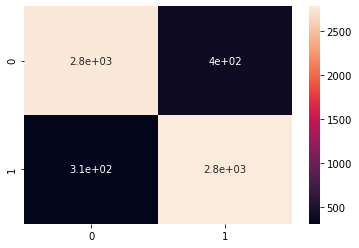

In [34]:
#Outputting confusion matrix heatmap 
sns.heatmap(results, annot=True)

In [35]:
#making a crosstab and setting into a data frame
df_c = pd.crosstab(target_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

In [36]:
#Showing stored data
df_c

Predicted,0,1,All
Actual,,,
0,2754,401,3155
1,314,2781,3095
All,3068,3182,6250


# 8. Get the precision, recall, and F1-score for the test set predictions.

In [37]:
#Getting precision
precision_score(target_test,y_pred)

0.8739786297925832

In [38]:
#Getting recall 
recall_score(target_test,y_pred)

0.8985460420032311

In [39]:
#Getting f1 score
f1_score(target_test,y_pred)

0.8860920822048749

# 9.Create a ROC curve for the test set.

In [40]:
#passing target_test and generated predictor to ROC curve 
#unpacking data
fpr , tpr , _ = metrics.roc_curve(target_test,y_pred)

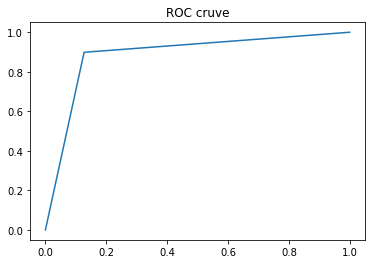

In [41]:
#Roc curve
plt.title("ROC cruve")
plt.plot(fpr,tpr)

# 10. Pick another classification model you learned about this week and repeat steps (5) – (9).

# K - Nearest Neighbors

In [42]:
#Getting instance of  kNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [43]:
#Trainning kNeighborsClassifier
knn_model = logit.fit(features_train_vec, target_train)

In [44]:
#Set predictor
y_knn_pred = knn_model.predict(features_test_vsc)

In [45]:
#Get accuracy
accuracy_score(target_test, y_knn_pred)

0.8856

In [46]:
#Save confusion matrix to results
results_knn = confusion_matrix(target_test, y_pred)
print(results_knn)

[[2754  401]
 [ 314 2781]]


<AxesSubplot:>

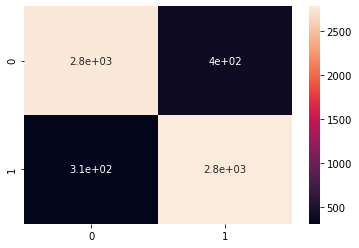

In [47]:
#Output heat map
sns.heatmap(results_knn, annot=True)

In [48]:
#Get precision_score
precision_score(target_test,y_knn_pred)

0.8739786297925832

In [49]:
#Get recall_score
recall_score(target_test,y_knn_pred)

0.8985460420032311

In [50]:
#Get f1_score
f1_score(target_test,y_knn_pred)

0.8860920822048749

In [51]:
#Applying roc curve
fpr , tpr , _ = metrics.roc_curve(target_test,y_knn_pred)

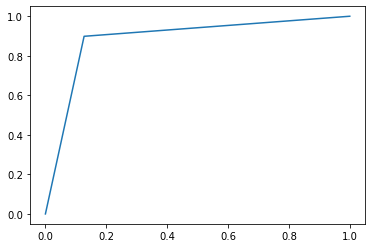

In [52]:
#plotting roc curve
plt.plot(fpr,tpr)